<a href="https://colab.research.google.com/github/desirajusantosh/DS/blob/master/image_classifier_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = untar_data(URLs.PETS)

In [4]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_185.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_83.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_152.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_39.jpg')]

In [0]:
np.random.seed(2)

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames,pat,ds_tfms=get_transforms(),size=224)

In [12]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,german_shorthaired,Abyssinian,Abyssinian,wheaten_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,japanese_chin,Persian,american_pit_bull_terrier,pug
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


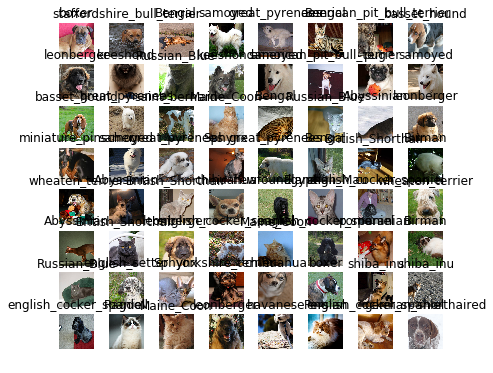

In [14]:
data.show_batch(rows=9
                ,figsize=(7,6))

In [15]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [16]:
data.c


37

In [17]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 82932415.88it/s]


In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.410080,0.367721,0.110961,01:26
1,0.555688,0.282193,0.086604,01:27
2,0.352325,0.250835,0.083221,01:26
3,0.256697,0.241153,0.080514,01:26


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

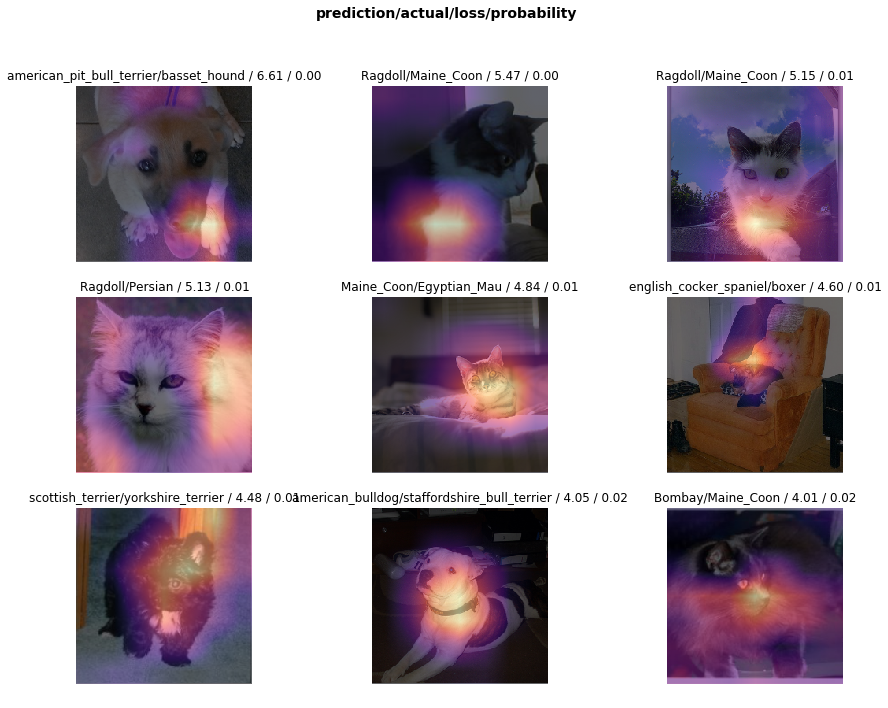

In [22]:
interp.plot_top_losses(9,figsize=(15,11))

In [23]:
interp.most_confused(min_val=2)


[('Bengal', 'Egyptian_Mau', 8),
 ('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('Russian_Blue', 'Bombay', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'miniature_pinscher', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Sphynx', 'chihuahua', 2),
 ('beagle', 'basset_hound', 2),
 ('chihuahua', 'staffordshire_bull_terrier', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('wheaten_terrier', 'great_pyrenees', 2)]

In [0]:
learn.unfreeze()


In [25]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.508924,0.353317,0.110284,01:28


In [26]:
learn.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate')

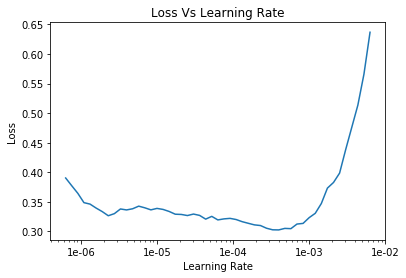

In [27]:
learn.recorder.plot()
plt.title("Loss Vs Learning Rate")

In [28]:
learn.unfreeze() 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.306286,0.298361,0.089310,01:29
1,0.252137,0.288245,0.087957,01:28


In [29]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320)
data.normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 78623563.75it/s]


In [30]:
learn.fit_one_cycle(8, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.920513,0.510864,0.092016,02:34
1,0.662307,0.229212,0.066306,02:28
2,0.363650,0.180648,0.054804,02:29
3,0.260883,0.160486,0.048714,02:31
4,0.189235,0.150691,0.050068,02:30
5,0.149631,0.148800,0.049391,02:30
6,0.122871,0.148944,0.051421,02:31
7,0.108489,0.149331,0.051421,02:30
